## Install dan Import Library

In [1]:
!pip install sktime[all_extras]

     |████████████████████████████████| 6.7 MB 28.4 MB/s 
     |████████████████████████████████| 3.3 MB 55.9 MB/s 
     |████████████████████████████████| 9.8 MB 47.6 MB/s 
     |████████████████████████████████| 793 kB 36.5 MB/s 
     |████████████████████████████████| 6.9 MB 38.7 MB/s 
     |████████████████████████████████| 11.2 MB 48.0 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 118 kB 54.0 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 136 kB 11.0 MB/s 
     |████████████████████████████████| 1.4 MB 37.6 MB/s 
     |████████████████████████████████| 97 kB 5.9 MB/s 
     |████████████████████████████████| 580 kB 63.6 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 788 kB 45.7 MB/s 
     |█████

In [1]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm
import glob
import os
import datetime as dt

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from statsmodels.tsa.arima_model import ARIMA
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

# Basic

**Before Differncing**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsap

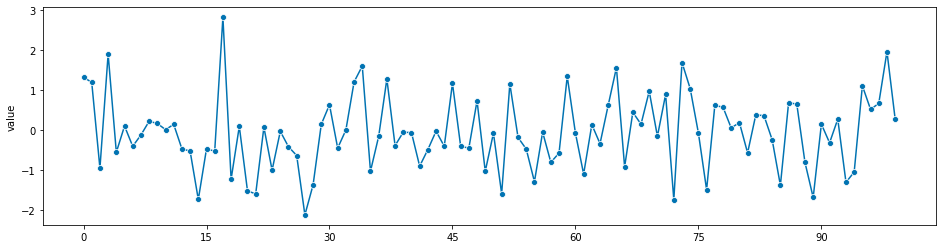

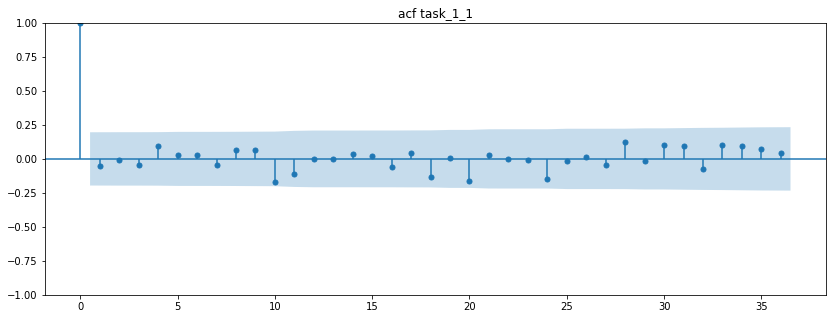

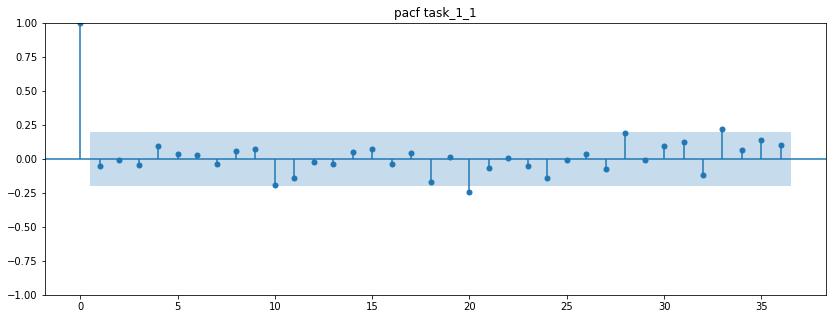

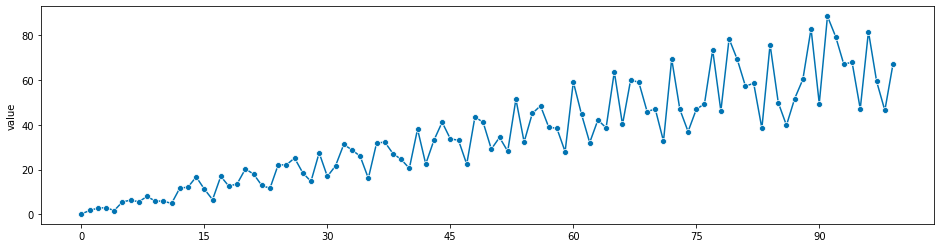

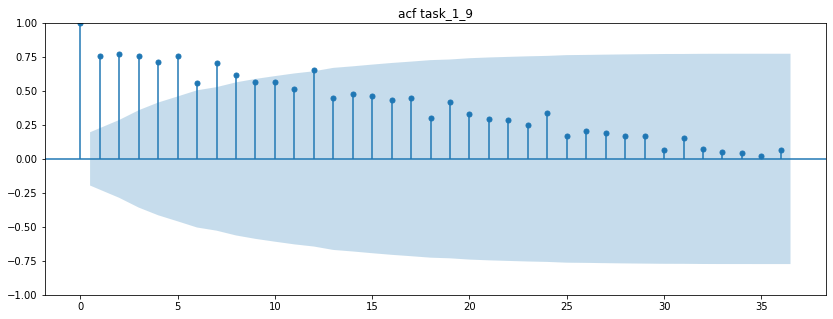

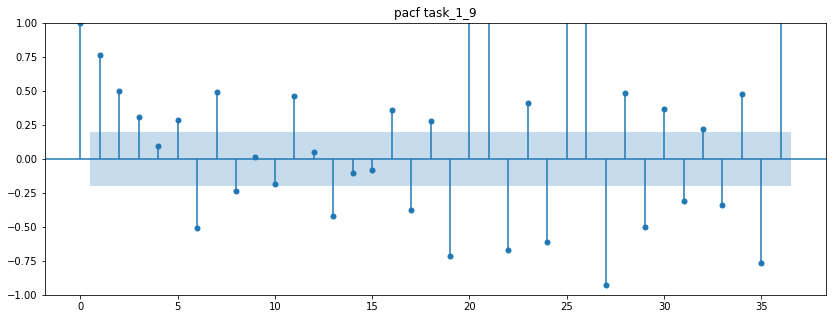

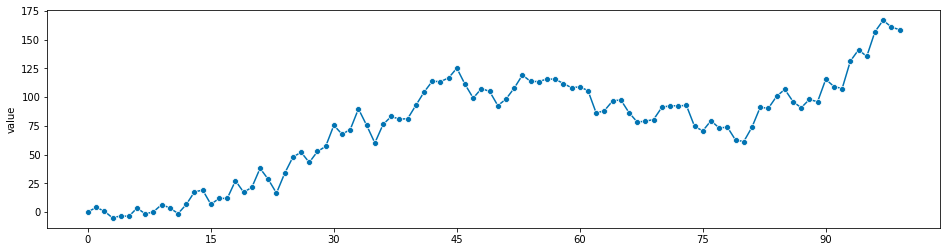

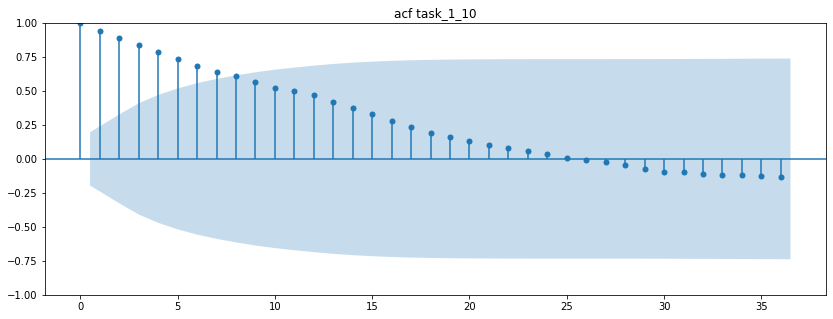

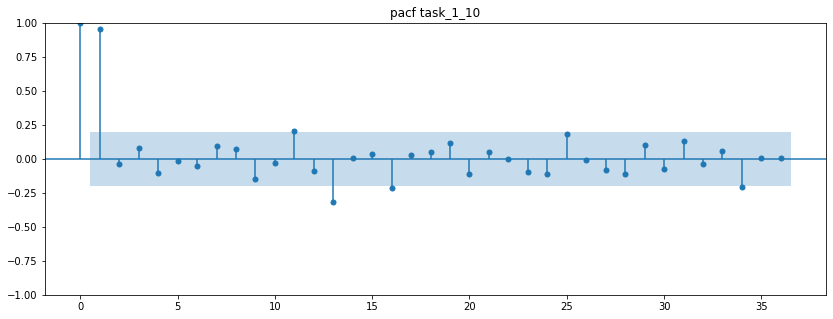

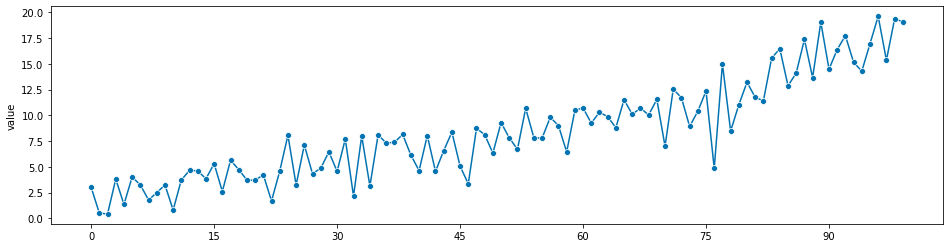

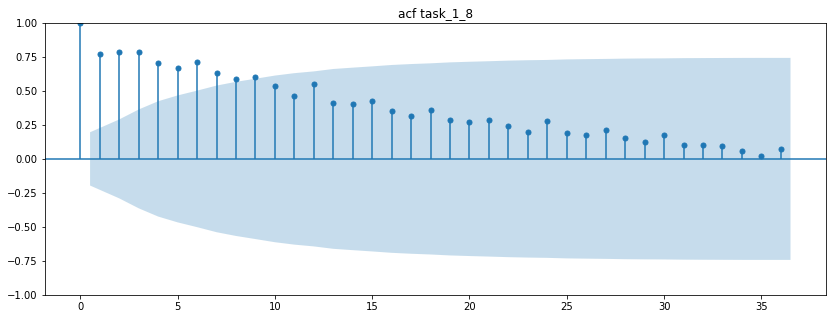

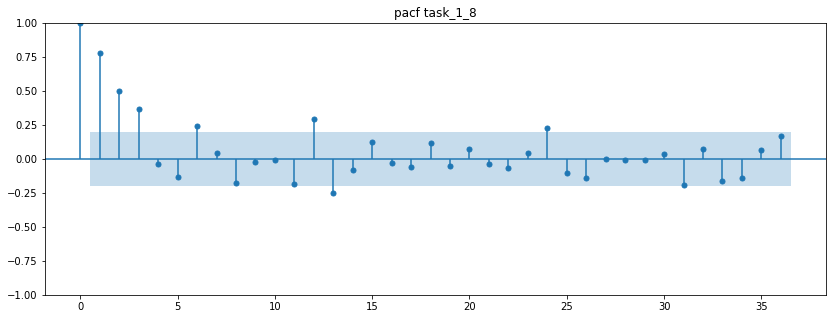

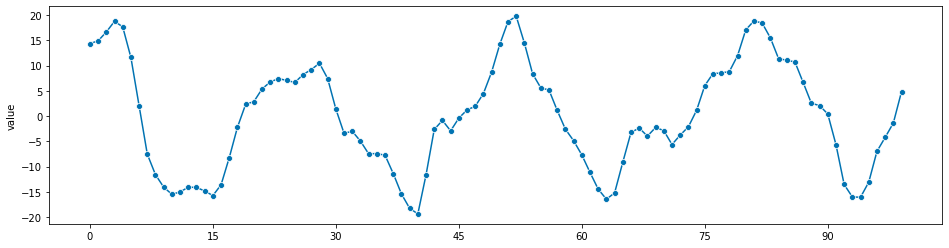

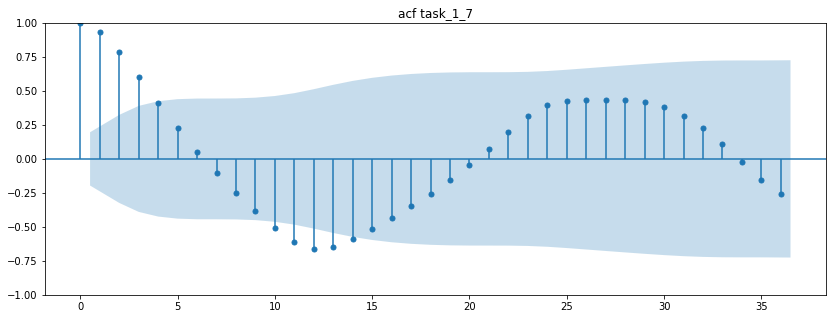

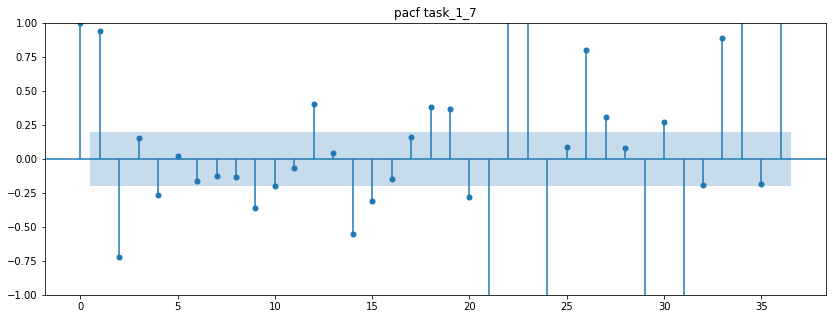

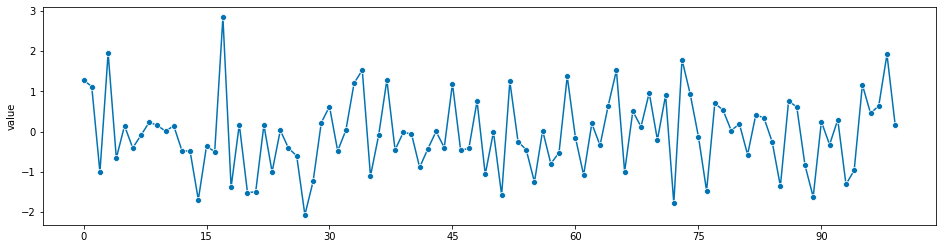

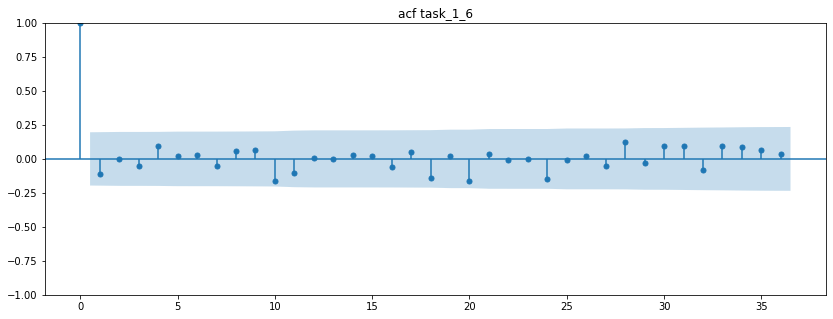

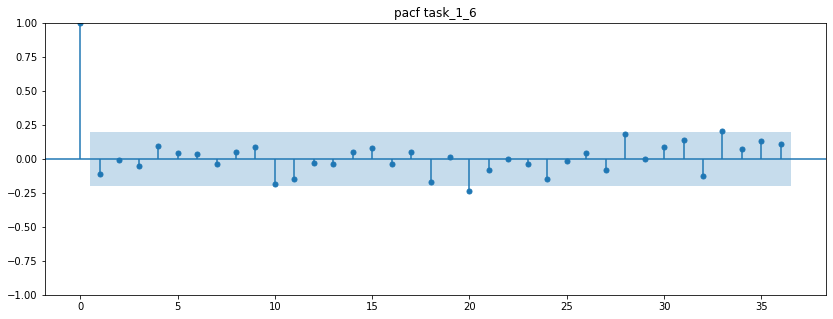

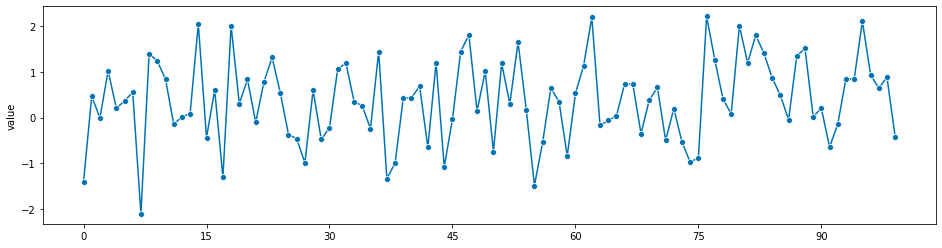

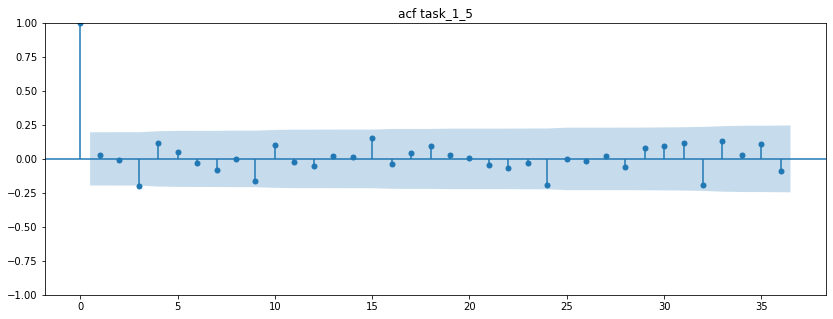

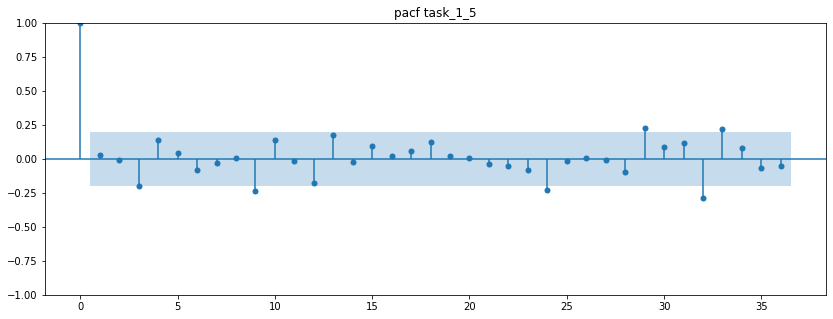

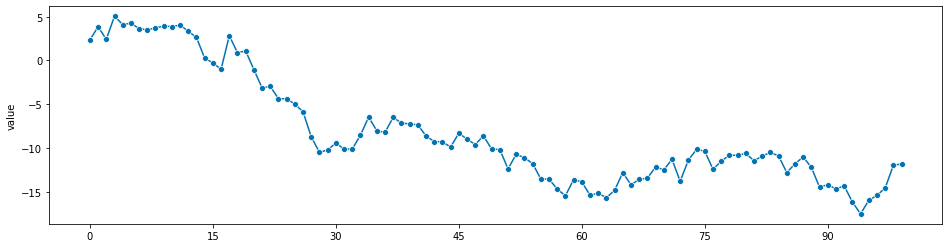

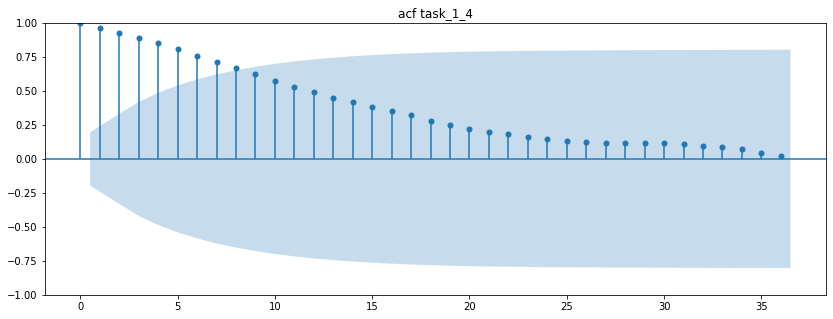

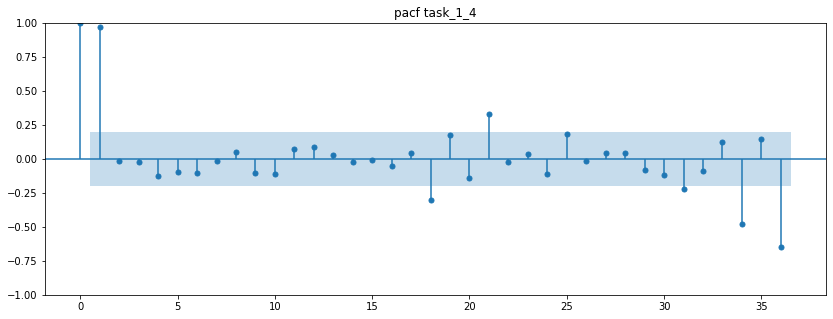

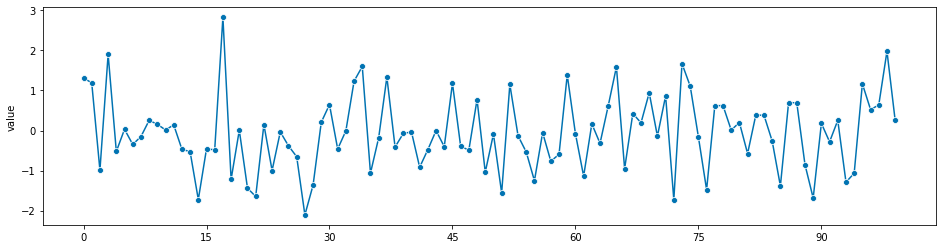

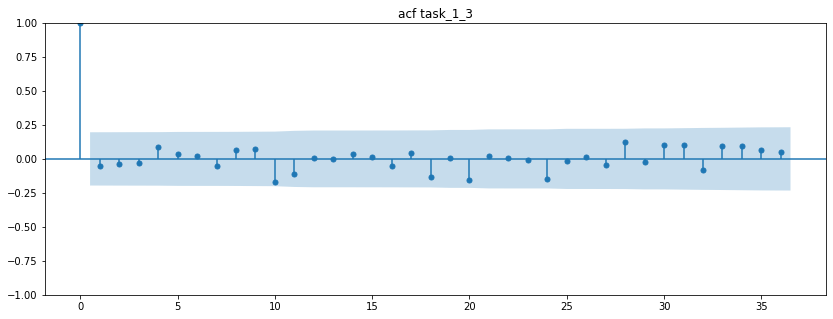

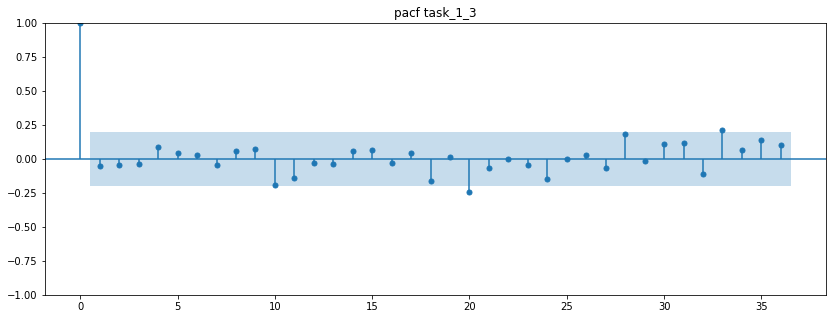

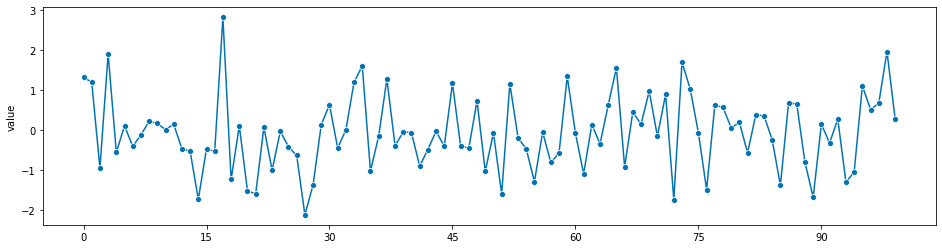

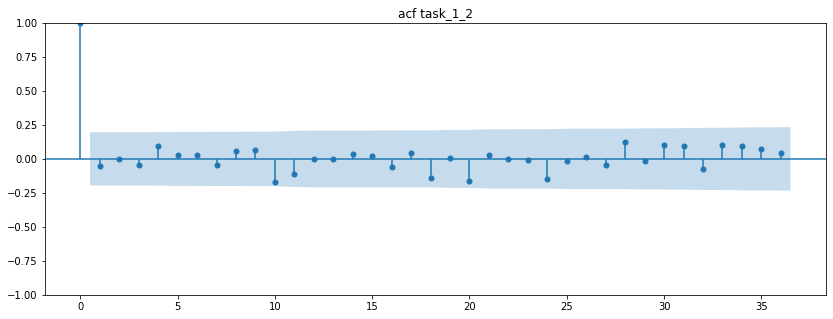

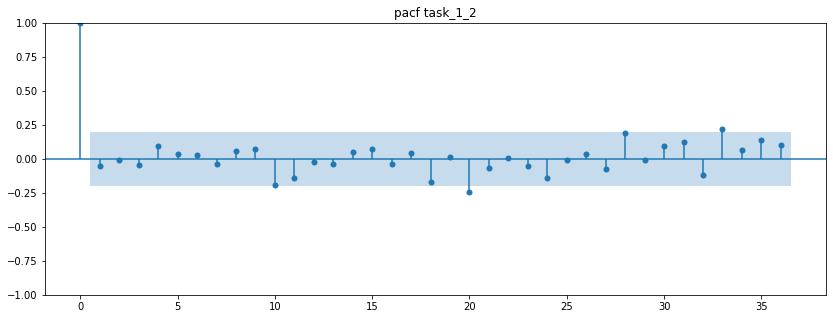

In [2]:
files = glob.glob('/content/drive/MyDrive/time_series_analysis_task/*.csv')
names = [os.path.basename(x) for x in files]
name = [name for name in names]
num = 0

for file in files:
  df = pd.read_csv(file)
  plot_series(df['value']);
  plot_acf(
    df['value'], 
    lags = 36,
    title = 'acf ' + name[num][:-4]
  ).set_size_inches((14,5));
  plot_pacf(
    df['value'], 
    lags = 36,
    title = 'pacf ' + name[num][:-4]
  ).set_size_inches((14,5));
  num += 1 

**After Differrencing**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsap

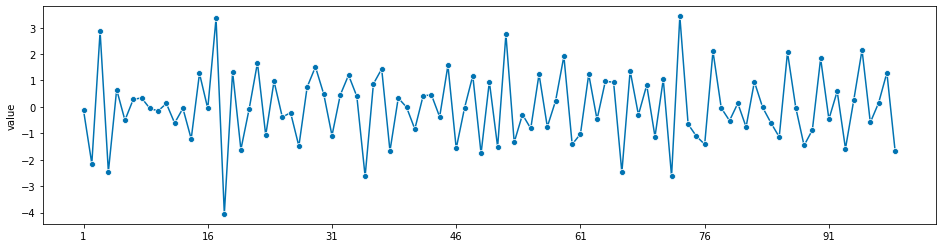

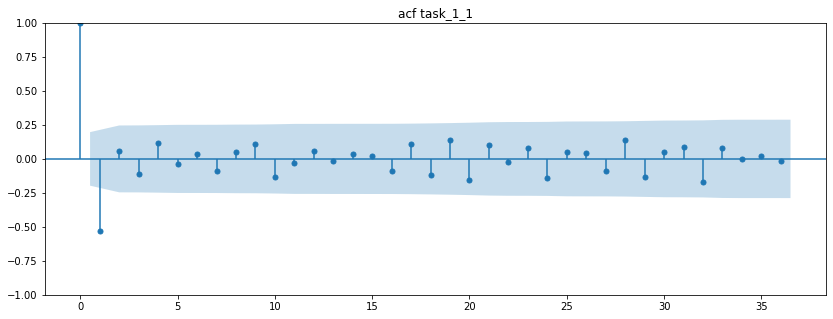

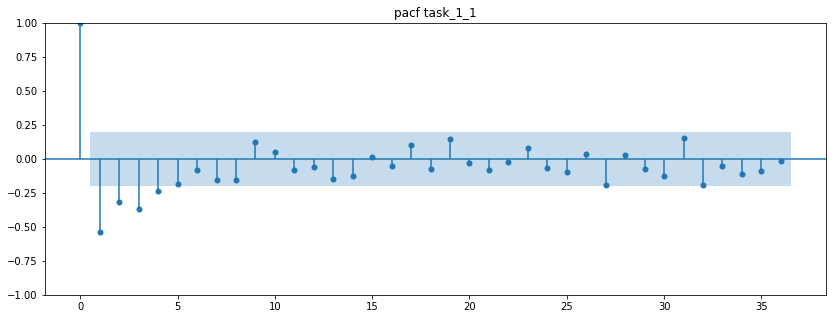

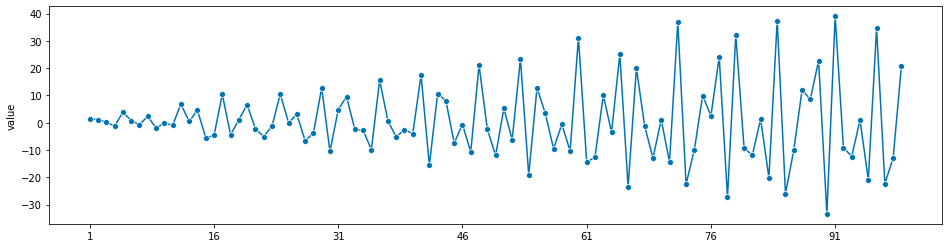

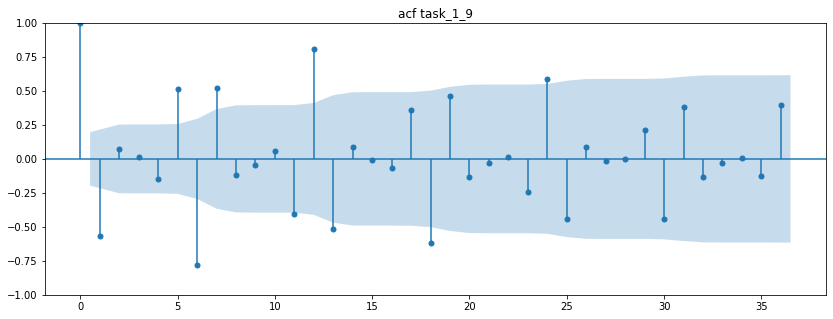

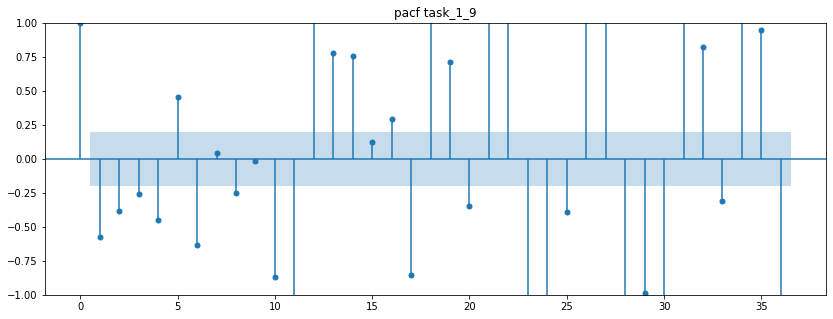

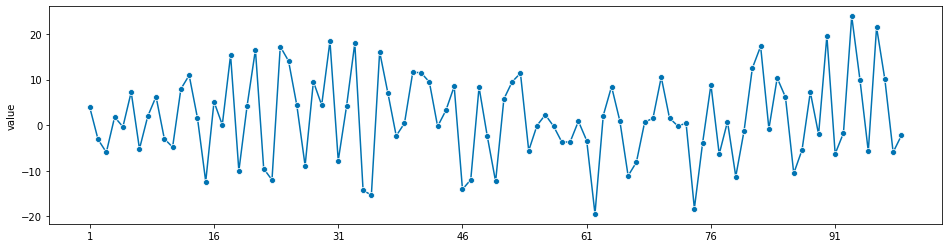

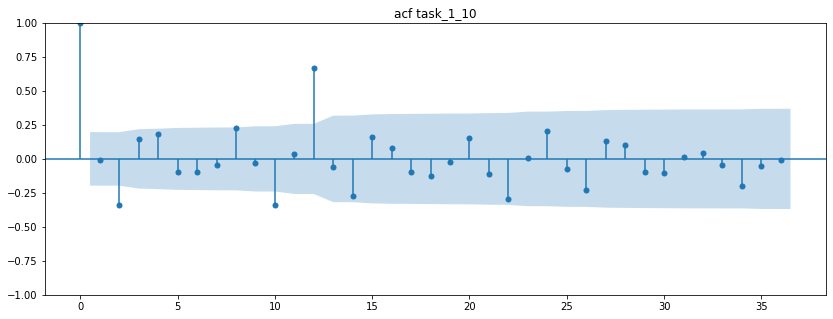

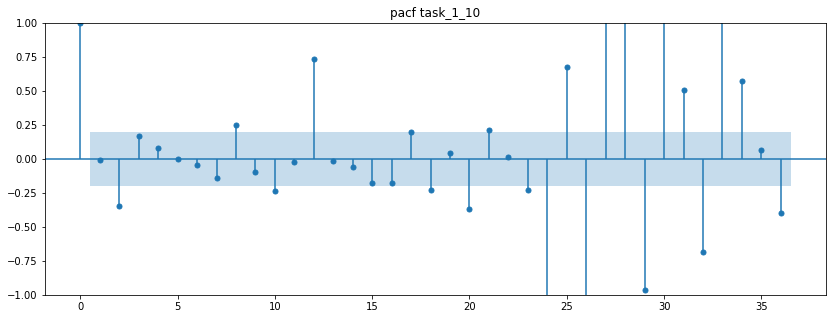

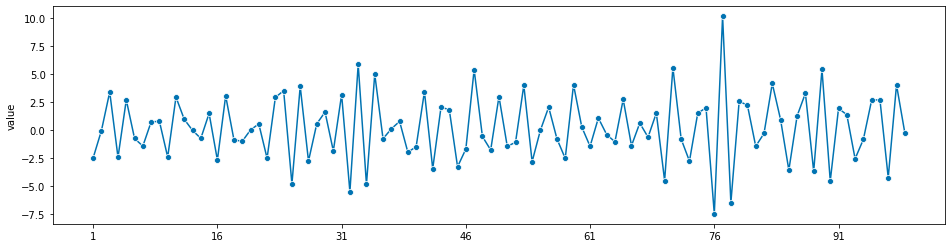

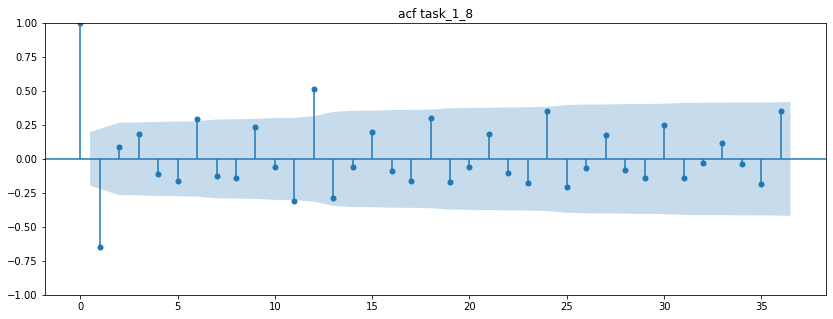

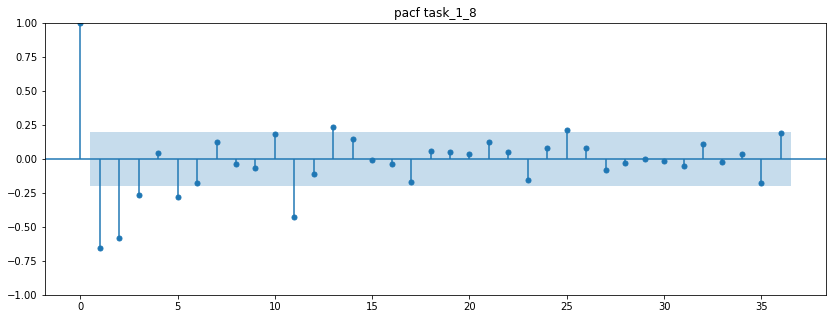

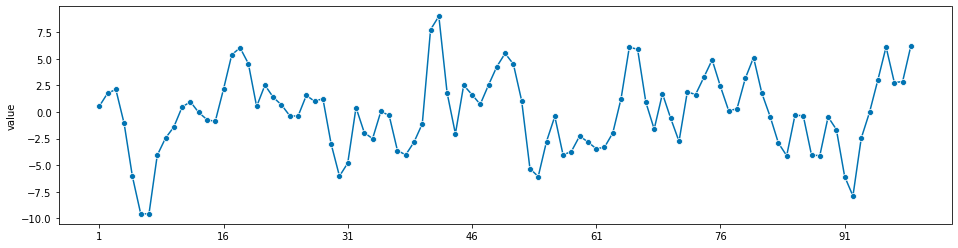

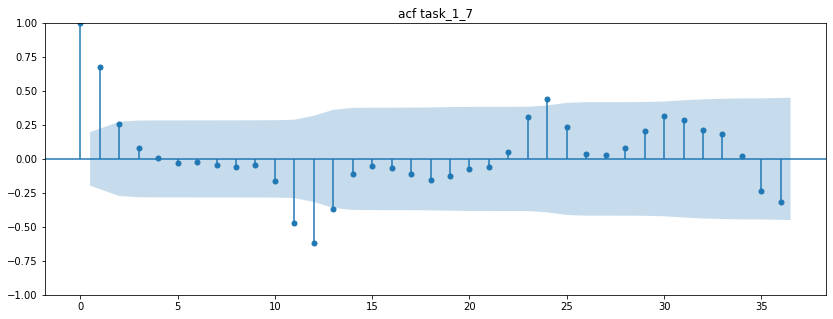

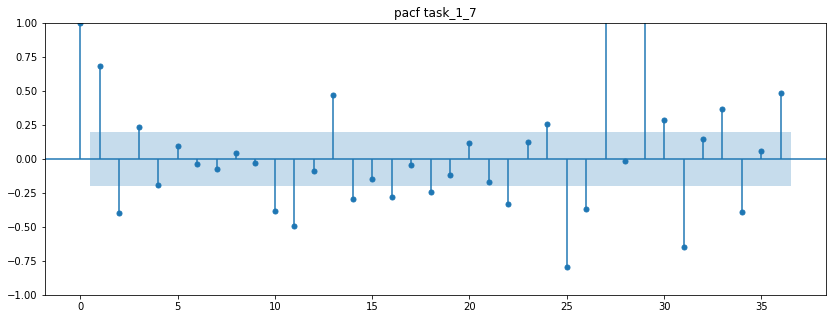

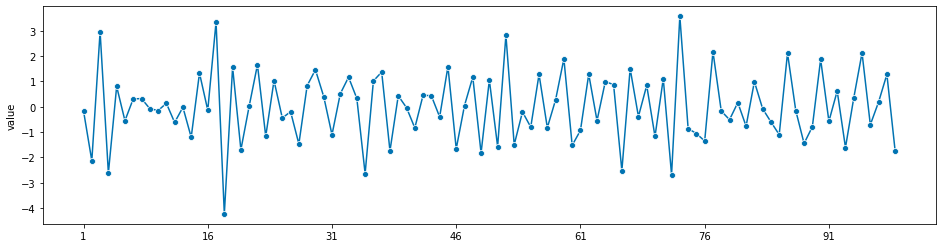

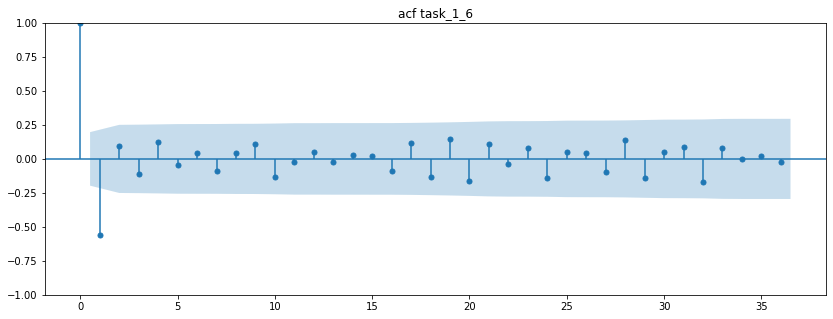

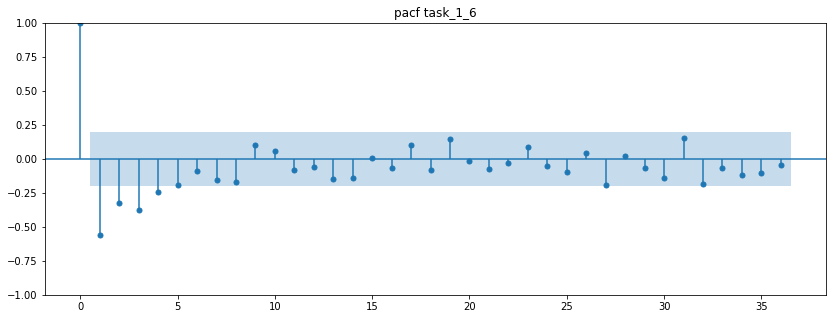

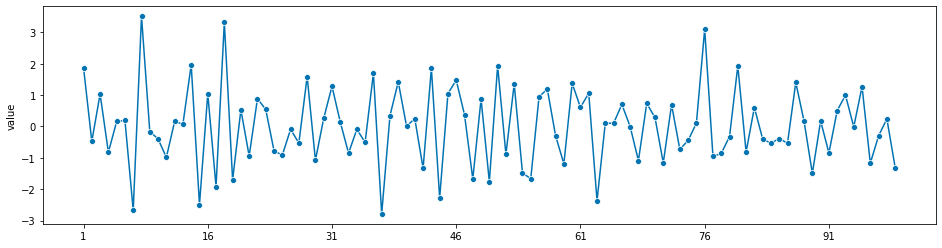

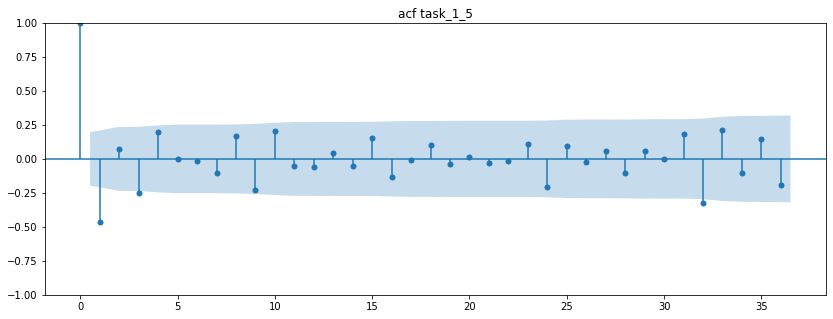

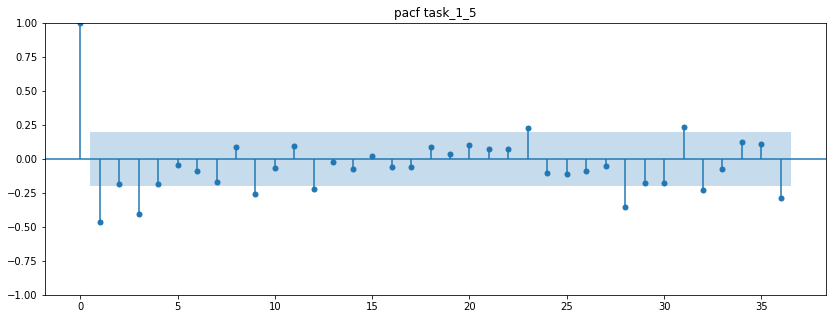

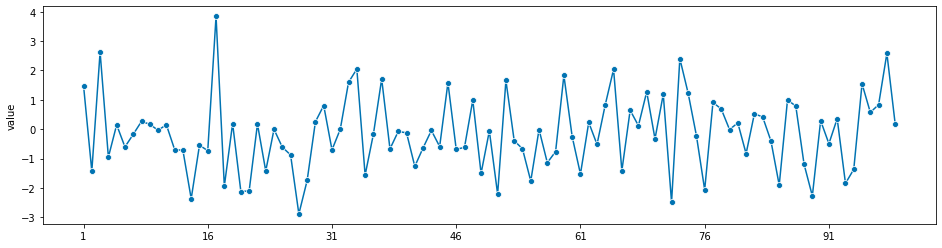

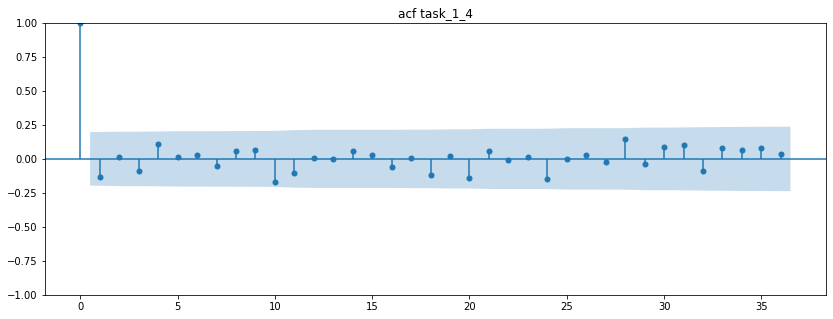

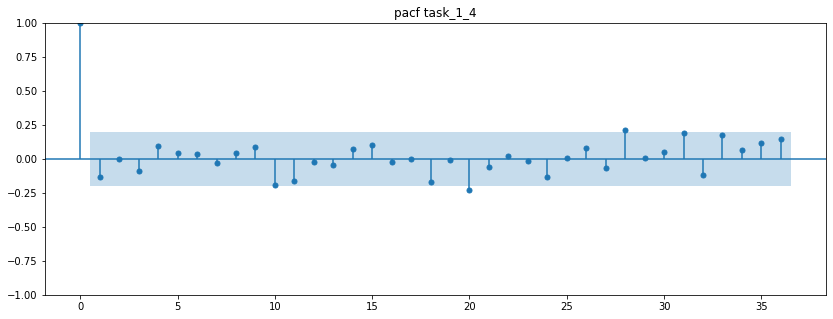

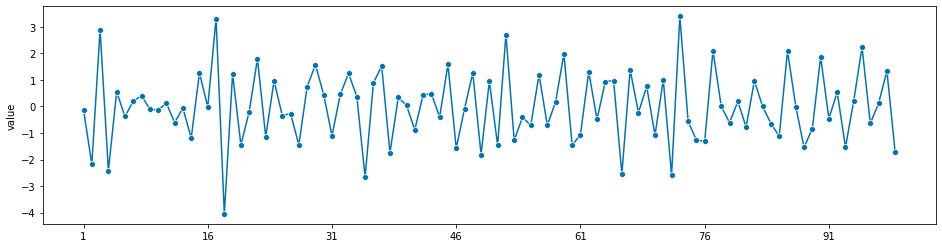

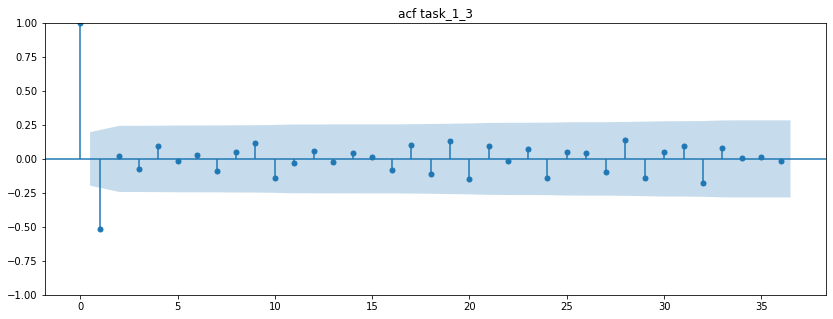

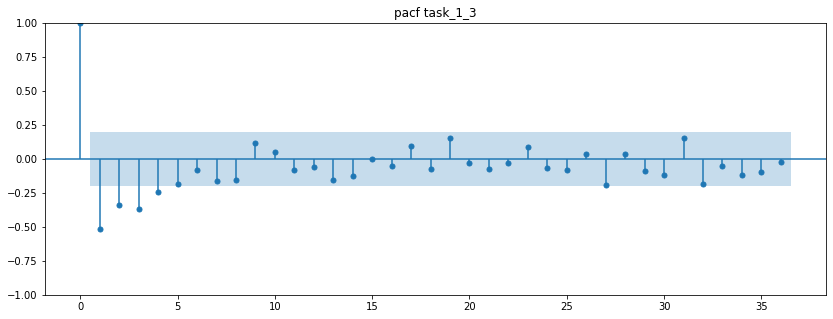

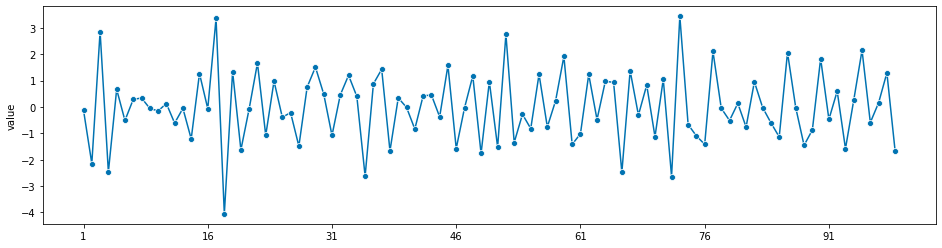

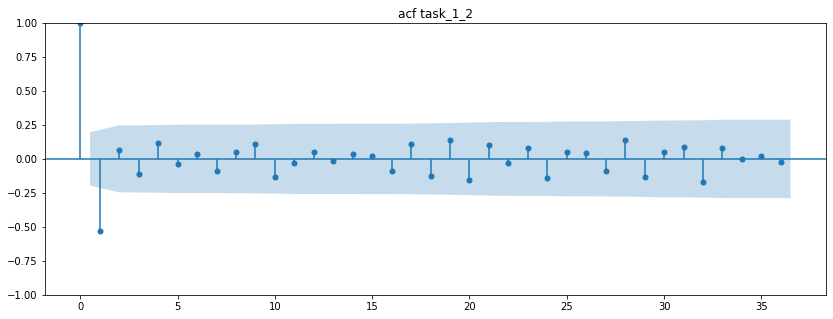

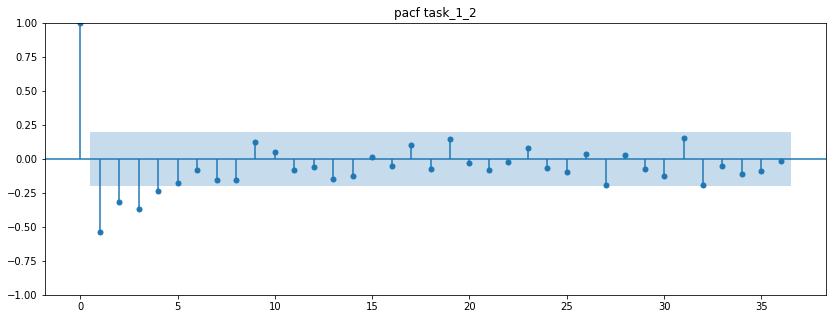

In [3]:
num = 0

for file in files:
  df = pd.read_csv(file)
  plot_series(df['value'].diff().dropna());
  plot_acf(
    df['value'].diff().dropna(), 
    lags = 36,
    title = 'acf ' + name[num][:-4]
  ).set_size_inches((14,5));
  plot_pacf(
    df['value'].diff().dropna(), 
    lags = 36,
    title = 'pacf ' + name[num][:-4]
  ).set_size_inches((14,5));
  num += 1 

Setelah dilakukan differencing model yang akan dipilih berdasarkan setiap data sebagai berikut :
- task_1_1 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_2 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_3 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_4 White Noise di karenakan no significant lag di plot acf maupun pacf
- task_1_5 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_6 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_7 White Noise di karenakan no significant lag di plot acf maupun pacf
- task_1_8 MA(1) dikarenakan significant lag 1 di plot acf
- task_1_9 White Noise di karenakan no significant lag di plot acf maupun pacf
- task_1_10 White Noise di karenakan no significant lag di plot acf maupun pacf

# Advanced

In [4]:
#pd.set_option('display.max_columns', 50)
pd.options.display.width = 0 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv',
                 parse_dates = ['Order Date', 'Ship Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8000 non-null   int64         
 1   Order ID       8000 non-null   object        
 2   Order Date     8000 non-null   datetime64[ns]
 3   Ship Date      8000 non-null   datetime64[ns]
 4   Ship Mode      8000 non-null   object        
 5   Customer ID    8000 non-null   object        
 6   Customer Name  8000 non-null   object        
 7   Segment        8000 non-null   object        
 8   Country        8000 non-null   object        
 9   City           8000 non-null   object        
 10  State          8000 non-null   object        
 11  Postal Code    8000 non-null   int64         
 12  Region         8000 non-null   object        
 13  Product ID     8000 non-null   object        
 14  Category       8000 non-null   object        
 15  Sub-Category   8000 n

## Soal No 1

In [7]:
df['GMV'] = (df['Quantity'] * df['Sales']) - (df['Discount'] * df['Sales'])

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4356.977625
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,40.262400


### Berdasarkan sehari hari

In [9]:
# Aggregate data
ecommerce_daily = df.groupby('Order Date', as_index=False).agg({
    "Order ID": 'nunique',
    "Customer ID": 'nunique',
    "GMV": 'sum',
    "Profit" : 'sum'
}).query("GMV > 0")

In [10]:
ecommerce_daily

,Order Date,Order ID,Customer ID,GMV,Profit
0,2014-01-03,1,1,29.606400,5.5512
1,2014-01-04,1,1,800.904000,-65.9901
2,2014-01-05,1,1,54.700800,4.8840
3,2014-01-06,3,3,28430.780000,1358.0524
4,2014-01-07,1,1,248.813200,-71.9621
...,...,...,...,...,...
1176,2017-12-26,3,3,1729.181600,55.5090
1177,2017-12-27,1,1,313.363200,-31.9742
1178,2017-12-28,9,9,6317.760704,216.9003
1179,2017-12-29,6,6,14610.641200,644.4338


In [11]:
ecommerce_daily['Day'] = ecommerce_daily['Order Date'].dt.day
ecommerce_daily['Week'] = ecommerce_daily['Order Date'].dt.weekday
ecommerce_daily['Month'] = ecommerce_daily['Order Date'].dt.month

In [12]:
ecommerce_daily

,Order Date,Order ID,Customer ID,GMV,Profit,Day,Week,Month
0,2014-01-03,1,1,29.606400,5.5512,3,4,1
1,2014-01-04,1,1,800.904000,-65.9901,4,5,1
2,2014-01-05,1,1,54.700800,4.8840,5,6,1
3,2014-01-06,3,3,28430.780000,1358.0524,6,0,1
4,2014-01-07,1,1,248.813200,-71.9621,7,1,1
...,...,...,...,...,...,...,...,...
1176,2017-12-26,3,3,1729.181600,55.5090,26,1,12
1177,2017-12-27,1,1,313.363200,-31.9742,27,2,12
1178,2017-12-28,9,9,6317.760704,216.9003,28,3,12
1179,2017-12-29,6,6,14610.641200,644.4338,29,4,12


### Berdasarkan Hari

In [13]:
# Aggregate data
ecommerce_day = ecommerce_daily.groupby('Day', as_index=False).agg({
    "Order ID": 'nunique',
    "Customer ID": 'nunique',
    "GMV": 'sum',
    "Profit" : 'sum'
}).query("GMV > 0")
ecommerce_day

,Day,Order ID,Customer ID,GMV,Profit
0,1,8,8,358551.158700,13888.3844
1,2,9,9,362928.163700,13050.3110
2,3,10,9,279790.622168,6011.7647
3,4,9,9,269117.266250,5219.2635
4,5,9,9,252027.502514,6712.6546
5,6,8,8,175055.775364,5631.2510
6,7,8,8,209909.653475,2693.3713
7,8,10,10,409767.215058,7818.0149
8,9,9,9,259308.625000,8389.4233
9,10,11,10,238221.658600,4485.4934


### Berdasarkan Bulan


In [14]:
# Aggregate data
ecommerce_month = ecommerce_daily.groupby('Month', as_index=False).agg({
    "Order ID": 'nunique',
    "Customer ID": 'nunique',
    "GMV": 'sum',
    "Profit" : 'sum'
}).query("GMV > 0")
ecommerce_month

,Month,Order ID,Customer ID,GMV,Profit
0,1,6,6,3.036084e+05,9249.9333
1,2,5,5,1.768581e+05,6864.4207
2,3,7,7,7.480667e+05,19114.6533
3,4,8,8,5.252741e+05,9631.2983
4,5,9,9,6.287556e+05,20922.8045
5,6,8,8,4.925120e+05,14622.3736
6,7,9,8,5.715275e+05,16134.9437
7,8,8,8,6.918543e+05,17566.3269
8,9,13,13,1.262192e+06,28141.2027
9,10,10,10,7.846649e+05,26319.6199


### Berdasarkan Minggu

In [15]:
# Aggregate data
ecommerce_week = ecommerce_daily.groupby('Week', as_index=False).agg({
    "Order ID": 'nunique',
    "Customer ID": 'nunique',
    "GMV": 'sum',
    "Profit" : 'sum'
}).query("GMV > 0")
ecommerce_week

,Week,Order ID,Customer ID,GMV,Profit
0,0,13,12,1.765116e+06,43131.7836
1,1,7,7,1.109532e+06,24157.3257
2,2,5,5,4.000181e+05,12540.5355
3,3,11,11,1.065481e+06,23736.8838
4,4,12,12,1.671176e+06,36556.9529
5,5,12,12,1.357792e+06,35127.8409
6,6,12,12,1.497527e+06,49822.5402


## Soal No 2

In [16]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
  
# Buat kolom periode order month

df['OrderMonth'] = df['Order Date'].apply(get_month)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,OrderMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4356.977625,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,40.262400,2015-10-01


In [17]:
# Kelompokkan berdasarkan ID pelanggan dan pilih hanya kolom order month

grouping = df.groupby('Customer ID')['OrderMonth']

# Ambil tanggal paling awal dari setiap pelanggan dan tetapkan kembali ke dataset asli

df['CohortMonth'] = grouping.transform('min')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,OrderMonth,CohortMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,2016-11-01,2015-10-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,2016-11-01,2015-10-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,2016-06-01,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4356.977625,2015-10-01,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,40.262400,2015-10-01,2015-10-01


In [18]:
# Fungsi ini memberi kita nilai integer tahun dan bulan

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
  
# Dapatkan bilangan bulat untuk bagian tanggal dari kolom 'OrderMonth'

invoice_year, invoice_month = get_date_int(df, 'OrderMonth')

# Dapatkan bilangan bulat untuk bagian tanggal dari kolom 'Cohortmonth'

cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# Hitung selisih perbedaan dalam tahun

years_diff = invoice_year - cohort_year

# Hitung selisih perbedaan dalam bulan

months_diff = invoice_month - cohort_month

# Ekstrak selisih perbedaan dalam bulan dari semua nilai sebelumnya

df['CohortIndex'] = years_diff * 12 + months_diff + 1 - 1
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,OrderMonth,CohortMonth,CohortIndex
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,2016-11-01,2015-10-01,13
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,2016-11-01,2015-10-01,13
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,2016-06-01,2016-06-01,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4356.977625,2015-10-01,2015-10-01,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,40.262400,2015-10-01,2015-10-01,0


In [19]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Hitung jumlah nilai unik per ID Pelanggan

cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()

# Buat pivot table

cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='Customer ID', fill_value=0)

# Pilih kolom pertama dan simpan ke cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]

# Bagilah jumlah kelompok dengan ukuran kelompok di sepanjang baris

retention = cohort_counts.divide(cohort_sizes, axis=0)*100

In [20]:
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01-01,27,0,0,2,2,0,2,1,1,3,...,4,3,5,3,1,1,6,9,6,4
2014-02-01,17,1,1,0,0,2,1,3,1,1,...,2,1,4,0,1,4,1,5,0,0
2014-03-01,51,3,1,7,5,0,5,2,4,4,...,6,7,5,6,13,2,11,9,0,0
2014-04-01,44,3,0,3,2,3,3,6,5,1,...,5,5,6,7,6,6,9,0,0,0
2014-05-01,49,5,3,2,8,3,8,8,3,2,...,5,4,15,8,11,8,0,0,0,0
2014-06-01,41,2,0,3,2,6,4,1,4,5,...,2,9,3,12,9,0,0,0,0,0
2014-07-01,34,3,4,0,5,7,3,1,6,1,...,6,3,8,6,0,0,0,0,0,0
2014-08-01,45,5,2,6,3,2,3,2,4,1,...,12,8,8,0,0,0,0,0,0,0
2014-09-01,65,4,7,8,1,3,5,7,6,1,...,11,11,0,0,0,0,0,0,0,0


cohort index 1 pada table di atas adalah yang kembali berbelanja setelah sebelumnya juga berbelanja di bulan sebelumnya (selisih 1 bulan)
dan pelanggan yang kembali berbelanja di bulan berikutnya paling banyak ada di bulan *2014-11-01*

## Soal No 3

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,OrderMonth,CohortMonth,CohortIndex
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,2016-11-01,2015-10-01,13
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,2016-11-01,2015-10-01,13
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000,2016-06-01,2016-06-01,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4356.977625,2015-10-01,2015-10-01,0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,40.262400,2015-10-01,2015-10-01,0


In [22]:
df.groupby('Order Date')[['Profit']].sum()

,Profit
Order Date,
2014-01-03,5.5512
2014-01-04,-65.9901
2014-01-05,4.8840
2014-01-06,1358.0524
2014-01-07,-71.9621
...,...
2017-12-26,55.5090
2017-12-27,-31.9742
2017-12-28,216.9003


In [23]:
df2 = df.loc[df['Order Date'] > '2017-09-01']

In [24]:
df2

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,GMV,OrderMonth,CohortMonth,CohortIndex
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Paper,Easy-staple paper,29.472,3,0.2,9.9468,82.5216,2017-10-01,2014-08-01,38
41,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,559.2384,2017-09-01,2014-02-01,43
43,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,172.1088,2017-09-01,2014-10-01,35
71,72,CA-2017-114440,2017-09-14,2017-09-17,Second Class,TB-21520,Tracy Blumstein,Consumer,United States,Jackson,...,Paper,Telephone Message Books with Fax/Mobile Sectio...,19.050,3,0.0,8.7630,57.1500,2017-09-01,2014-10-01,35
75,76,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,Binders,Economy Binders,1.248,3,0.8,-1.9344,2.7456,2017-12-01,2014-12-01,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,7964,CA-2017-104864,2017-11-18,2017-11-23,Second Class,JS-15685,Jim Sink,Corporate,United States,Miramar,...,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",389.056,4,0.2,48.6320,1478.4128,2017-11-01,2016-06-01,17
7964,7965,CA-2017-104864,2017-11-18,2017-11-23,Second Class,JS-15685,Jim Sink,Corporate,United States,Miramar,...,Paper,Xerox 221,20.736,4,0.2,7.2576,78.7968,2017-11-01,2016-06-01,17
7965,7966,CA-2017-104864,2017-11-18,2017-11-23,Second Class,JS-15685,Jim Sink,Corporate,United States,Miramar,...,Paper,Xerox 211,41.472,8,0.2,14.5152,323.4816,2017-11-01,2016-06-01,17
7996,7997,US-2017-105998,2017-11-03,2017-11-05,First Class,CR-12580,Clay Rozendal,Home Office,United States,San Diego,...,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.8900,998.7500,2017-11-01,2016-04-01,19


<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

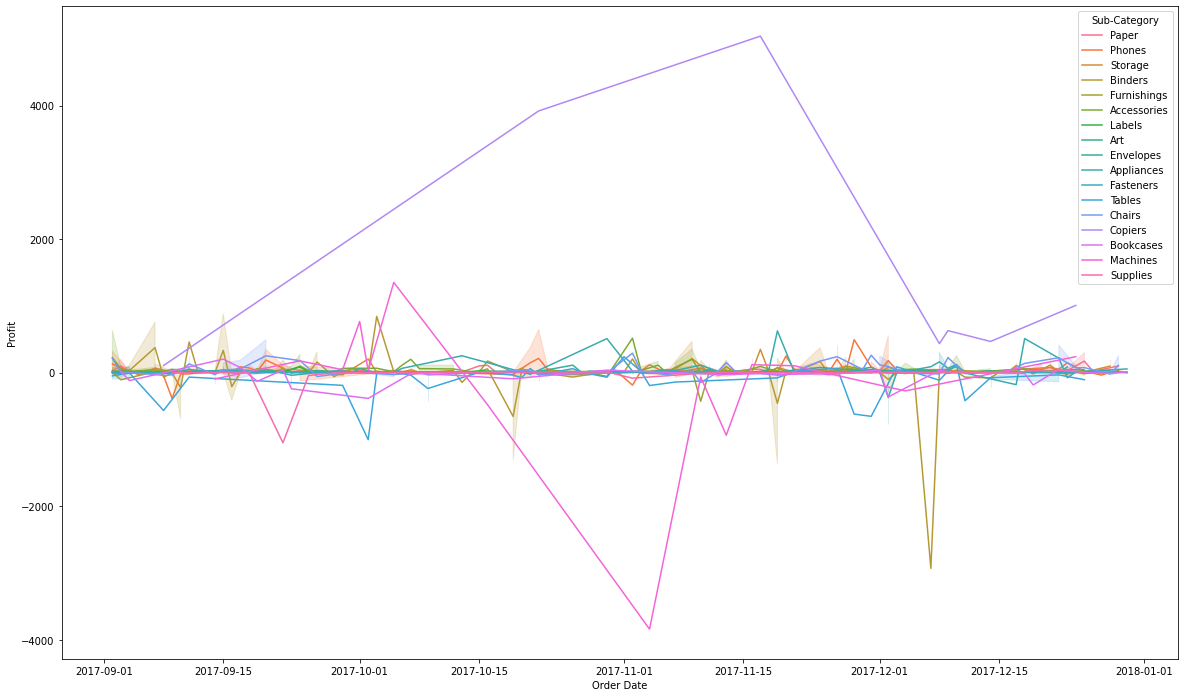

In [25]:
plt.figure(figsize=(20,12))
sns.lineplot(data=df2, x='Order Date', y='Profit', hue='Sub-Category')

Produk yang membawa profit terbesar dalam 3 bulan terakhir adalah Copiers

## Soal No 4



In [26]:
df['Month'] = pd.to_datetime(df['Order Date'], format="%Y-%m")

In [54]:
trx = df.groupby('Month')[['Order ID']].count()
trx.index = pd.PeriodIndex(trx.index, freq = 'D')
trx

,Order ID
Month,
2014-01-03,1
2014-01-04,3
2014-01-05,1
2014-01-06,9
2014-01-07,2
...,...
2017-12-26,3
2017-12-27,2
2017-12-28,17


<AxesSubplot:xlabel='Month'>

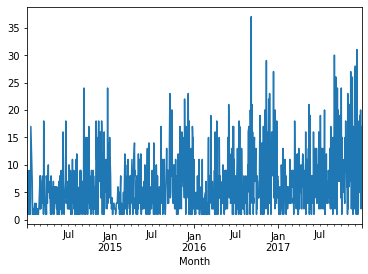

In [55]:
trx['Order ID'].plot()

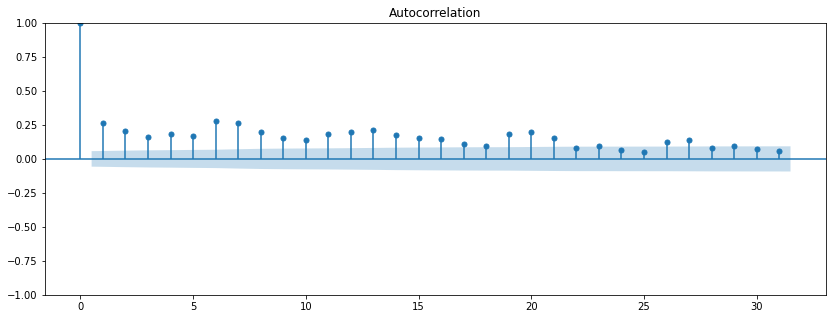

In [56]:
# plot ACF
plot_acf(trx).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


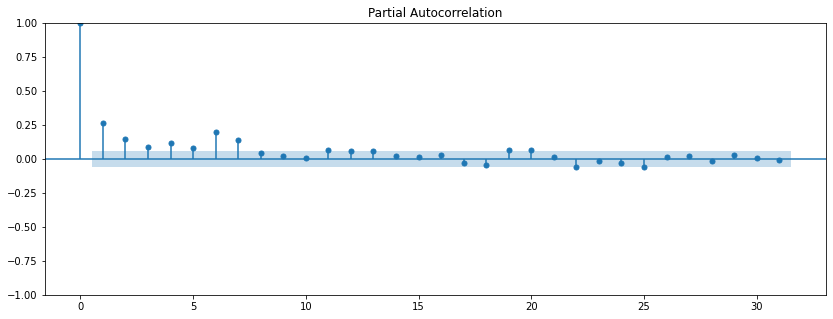

In [57]:
# plot PACF
plot_pacf(trx).set_size_inches((14,5));

In [58]:
# Do train-test split
y_train, y_test = temporal_train_test_split(trx, test_size=30)

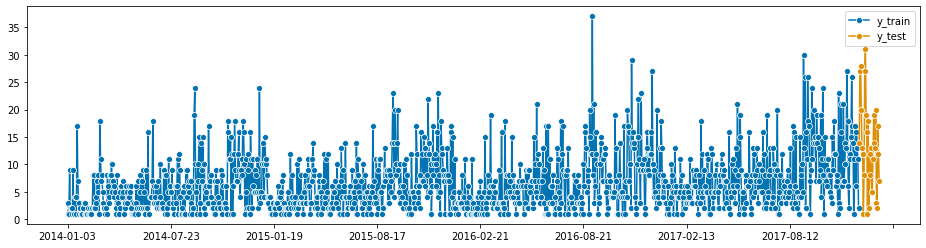

In [59]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [60]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2017-11-30', '2017-12-01', '2017-12-02', '2017-12-03',
             '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
             '2017-12-08', '2017-12-09', '2017-12-10', '2017-12-11',
             '2017-12-13', '2017-12-14', '2017-12-15', '2017-12-16',
             '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
             '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
             '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
             '2017-12-29', '2017-12-30'],
            dtype='period[D]', is_relative=False)

### Naive Modeling

In [121]:
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

In [122]:
# fit model to train data
naive_forecaster.fit(y = y_train)

NaiveForecaster()

In [123]:
y_pred_naive = naive_forecaster.predict(fh)

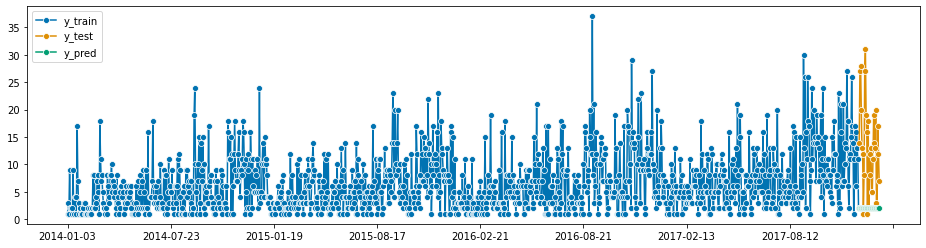

In [124]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [125]:
mean_absolute_percentage_error(y_test, y_pred_naive) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


127.37856738945668

### Auto ETS

In [105]:
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=5)

In [106]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

AutoETS(auto=True, sp=5)

In [107]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

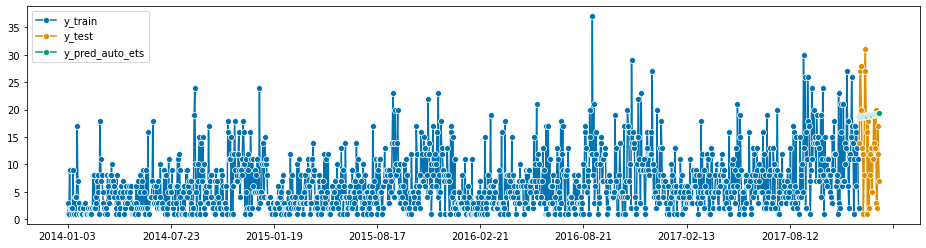

In [108]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

In [119]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


62.937903226437165

### TBATS model

In [113]:
# define TBATS model
tbats_forecaster = TBATS(sp=39)

In [117]:
# fit forecaster to data
tbats_forecaster.fit(y_train)

/usr/local/lib/python3.7/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.7/dist-packages/tbats/transformation/BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))
/usr/local/lib/python3.7/dist-packages/tbats/transformation/BoxCox.py:36: RuntimeWarning: overflow encountered in exp
  return np.exp(y)


TBATS(sp=39)

In [111]:
# do prediction based on forecast horizon we already defined
y_pred_tbats = tbats_forecaster.predict(fh=fh)

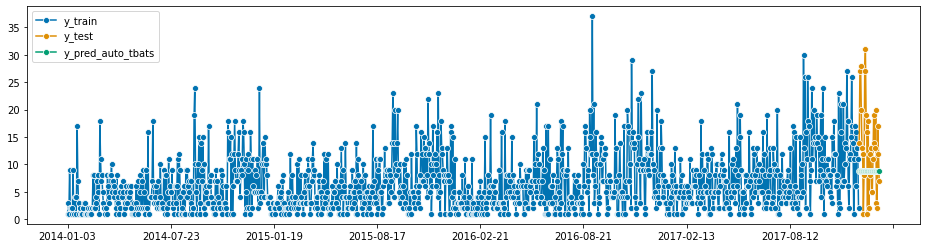

In [112]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_auto_tbats"]);

In [118]:
mean_absolute_percentage_error(y_test, y_pred_tbats) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


68.59782704920346

### Auto ARIMA

In [95]:
# define arima forecaster model
arima_forecaster = AutoARIMA(sp=30, suppress_warnings=True, random_state = 1000)

In [96]:
# fit forecaster to train data
arima_forecaster.fit(y_train)

AutoARIMA(random_state=1000, sp=30, suppress_warnings=True)

In [97]:
# do prediction based on forecast horizon we already defined
y_pred_arima = arima_forecaster.predict(fh=fh)

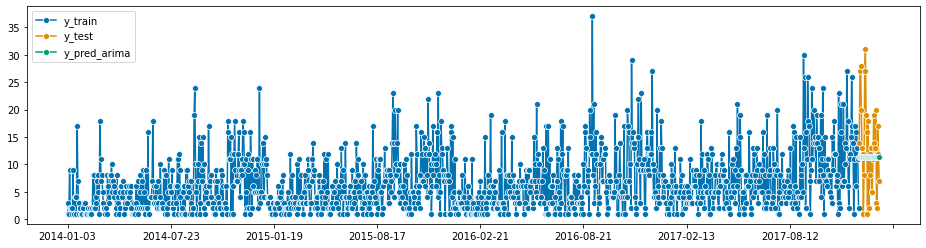

In [98]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, labels=["y_train", "y_test", "y_pred_arima"]);

In [99]:
mean_absolute_percentage_error(y_test, y_pred_arima) * 100

/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1548: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


59.202145873615564

berdasarkan hasil mape terkecil maka saya akan merekomendasikan model Auto ARIMA